<a href="https://colab.research.google.com/github/victorjms/histograma/blob/main/Histogramas_y_Cajas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Victor Montenegro

## Ejercicio de Histogramas y Diagramas de caja

Los datos para este ejercicio son de Data.World y poseen información sobre la posesión de perros y gatos en los Estados Unidos.

Puede descargar los datos aquí.
Tarea

Responde y completa lo siguiente:

1. Traza un histograma del porcentaje de poseedores de perros.

2. Traza un histograma del porcentaje de poseedores de gatos.

3. ¿Qué podemos ver al comparar estos dos histogramas? ¿Qué información nos da?

4. Opcional/Extra: traza estos dos histogramas en el mismo plot. A continuación, un ejemplo de cómo debería lucir:

5. Crea dos diagramas de caja en el mismo plot: uno con el número medio de gatos por hogar y el otro, del número medio de perros. Más abajo, un ejemplo de cómo podría lucir:

6. ¿Qué podemos ver al comparar estos dos diagramas de caja? ¿Qué información nos da?

Entrega un cuaderno computacional con tu código y respuestas a estas 5 preguntas.


In [269]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [270]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [321]:
filename = '/content/drive/My Drive/Coding Dojo/Semana 04/catsvdogs.csv'  # colocamos la ruta del archivo a importar
df = pd.read_csv(filename, sep=";") # colocamos el contenido del archivo en "df"
df.tail() # imprimimos "df"

,Location,Number of Households (in 1000),Percentage of households with pets,Number of Pet Households (in 1000),Percentage of Dog Owners,Dog Owning Households (1000s),Mean Number of Dogs per household,Dog Population (in 1000),Percentage of Cat Owners,Cat Owning Households,Mean Number of Cats,Cat Population,Unnamed: 12
45,Washington,2.632,"62,7",1.649,"36,3",954.0,"1,7",1.609,"39,0",1.028,"1,8",1.844,NaN
46,West Virginia,765.000,"62,1",475.000,"45,8",350.0,"1,8",648.000,"38,1",291.000,"2,2",628.000,NaN
47,Wisconsin,2.350,"57,5",1.352,"33,9",796.0,"1,4",1.138,"33,0",776.000,"1,9",1.510,NaN
48,Wyoming,221.000,"61,8",137.000,"38,8",86.0,"1,5",125.000,"33,9",75.000,"1,9",144.000,NaN
49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [322]:
# Elimina columna con valores NaN
df_cats_dogs = df.drop(columns=["Unnamed: 12"])

In [323]:
# Elimina fila con valores NaN
df_cats_dogs = df_cats_dogs.drop([49], axis=0)


In [324]:
df_cats_dogs.tail()

,Location,Number of Households (in 1000),Percentage of households with pets,Number of Pet Households (in 1000),Percentage of Dog Owners,Dog Owning Households (1000s),Mean Number of Dogs per household,Dog Population (in 1000),Percentage of Cat Owners,Cat Owning Households,Mean Number of Cats,Cat Population
44,Virginia,3.017,"53,4",1.611,"35,4",1.069,"1,6",1.699,"29,0",876.000,"2,1",1.855
45,Washington,2.632,"62,7",1.649,"36,3",954.000,"1,7",1.609,"39,0",1.028,"1,8",1.844
46,West Virginia,765.000,"62,1",475.000,"45,8",350.000,"1,8",648.000,"38,1",291.000,"2,2",628.000
47,Wisconsin,2.350,"57,5",1.352,"33,9",796.000,"1,4",1.138,"33,0",776.000,"1,9",1.510
48,Wyoming,221.000,"61,8",137.000,"38,8",86.000,"1,5",125.000,"33,9",75.000,"1,9",144.000


In [325]:
# información de la tabla 
df_cats_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Location                            49 non-null     object 
 1   Number of Households (in 1000)      49 non-null     float64
 2   Percentage of households with pets  49 non-null     object 
 3   Number of Pet Households (in 1000)  49 non-null     float64
 4   Percentage of Dog Owners            49 non-null     object 
 5   Dog Owning Households (1000s)       49 non-null     float64
 6   Mean Number of Dogs per household   49 non-null     object 
 7   Dog Population (in 1000)            49 non-null     float64
 8   Percentage of Cat Owners            49 non-null     object 
 9   Cat Owning Households               49 non-null     float64
 10  Mean Number of Cats                 49 non-null     object 
 11  Cat Population                      49 non-null

In [326]:
# cambio nombre columna
df_cats_dogs.rename(columns={"Percentage of Dog Owners":"percentage_dog_owners"}, inplace=True)

In [327]:
# cambio nombre de columna
df_cats_dogs.rename(columns={"Percentage of Cat Owners":"percentage_cat_owners"}, inplace=True)

In [328]:
df_cats_dogs.head()

,Location,Number of Households (in 1000),Percentage of households with pets,Number of Pet Households (in 1000),percentage_dog_owners,Dog Owning Households (1000s),Mean Number of Dogs per household,Dog Population (in 1000),percentage_cat_owners,Cat Owning Households,Mean Number of Cats,Cat Population
0,Alabama,1.828,"59,5",1.088,"44,1",807.000,"1,7",1.410,"27,4",501.000,"2,5",1.252
1,Arizona,2.515,"59,5",1.497,"40,1",1.008,"1,8",1.798,"29,6",743.000,"1,9",1.438
2,Arkansas,1148.000,"62,4",716.000,"47,9",550.000,"2,0",1.097,"30,6",351.000,"2,3",810.000
3,California,12.974,"52,9",6.865,"32,8",4.260,"1,6",6.687,"28,3",3.687,"1,9",7.118
4,Colorado,1.986,"61,3",1.217,"42,5",845.000,"1,6",1.349,"32,3",642.000,"1,9",1191.000


In [329]:
# convertir string a int
df_cats_dogs['percentage_dog_owners']=df_cats_dogs['percentage_dog_owners'].str.replace(",","")
df_cats_dogs['percentage_dog_owners']=df_cats_dogs['percentage_dog_owners'].astype(int)
df_cats_dogs.info()
df_cats_dogs.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Location                            49 non-null     object 
 1   Number of Households (in 1000)      49 non-null     float64
 2   Percentage of households with pets  49 non-null     object 
 3   Number of Pet Households (in 1000)  49 non-null     float64
 4   percentage_dog_owners               49 non-null     int64  
 5   Dog Owning Households (1000s)       49 non-null     float64
 6   Mean Number of Dogs per household   49 non-null     object 
 7   Dog Population (in 1000)            49 non-null     float64
 8   percentage_cat_owners               49 non-null     object 
 9   Cat Owning Households               49 non-null     float64
 10  Mean Number of Cats                 49 non-null     object 
 11  Cat Population                      49 non-null

,Location,Number of Households (in 1000),Percentage of households with pets,Number of Pet Households (in 1000),percentage_dog_owners,Dog Owning Households (1000s),Mean Number of Dogs per household,Dog Population (in 1000),percentage_cat_owners,Cat Owning Households,Mean Number of Cats,Cat Population
44,Virginia,3.017,"53,4",1.611,354,1.069,"1,6",1.699,"29,0",876.000,"2,1",1.855
45,Washington,2.632,"62,7",1.649,363,954.000,"1,7",1.609,"39,0",1.028,"1,8",1.844
46,West Virginia,765.000,"62,1",475.000,458,350.000,"1,8",648.000,"38,1",291.000,"2,2",628.000
47,Wisconsin,2.350,"57,5",1.352,339,796.000,"1,4",1.138,"33,0",776.000,"1,9",1.510
48,Wyoming,221.000,"61,8",137.000,388,86.000,"1,5",125.000,"33,9",75.000,"1,9",144.000


In [330]:
# convertir string a int
df_cats_dogs['percentage_cat_owners']=df_cats_dogs['percentage_cat_owners'].str.replace(",","")
df_cats_dogs['percentage_cat_owners']=df_cats_dogs['percentage_cat_owners'].astype(int)
df_cats_dogs.info()
df_cats_dogs.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Location                            49 non-null     object 
 1   Number of Households (in 1000)      49 non-null     float64
 2   Percentage of households with pets  49 non-null     object 
 3   Number of Pet Households (in 1000)  49 non-null     float64
 4   percentage_dog_owners               49 non-null     int64  
 5   Dog Owning Households (1000s)       49 non-null     float64
 6   Mean Number of Dogs per household   49 non-null     object 
 7   Dog Population (in 1000)            49 non-null     float64
 8   percentage_cat_owners               49 non-null     int64  
 9   Cat Owning Households               49 non-null     float64
 10  Mean Number of Cats                 49 non-null     object 
 11  Cat Population                      49 non-null

,Location,Number of Households (in 1000),Percentage of households with pets,Number of Pet Households (in 1000),percentage_dog_owners,Dog Owning Households (1000s),Mean Number of Dogs per household,Dog Population (in 1000),percentage_cat_owners,Cat Owning Households,Mean Number of Cats,Cat Population
0,Alabama,1.828,"59,5",1.088,441,807.000,"1,7",1.410,274,501.000,"2,5",1.252
1,Arizona,2.515,"59,5",1.497,401,1.008,"1,8",1.798,296,743.000,"1,9",1.438
2,Arkansas,1148.000,"62,4",716.000,479,550.000,"2,0",1.097,306,351.000,"2,3",810.000
3,California,12.974,"52,9",6.865,328,4.260,"1,6",6.687,283,3.687,"1,9",7.118
4,Colorado,1.986,"61,3",1.217,425,845.000,"1,6",1.349,323,642.000,"1,9",1191.000


In [331]:
# convertir a porcentaje
df_cats_dogs['percentage_dog_owners']=(df_cats_dogs['percentage_dog_owners'] / 1000)

In [332]:
df_cats_dogs.head()

,Location,Number of Households (in 1000),Percentage of households with pets,Number of Pet Households (in 1000),percentage_dog_owners,Dog Owning Households (1000s),Mean Number of Dogs per household,Dog Population (in 1000),percentage_cat_owners,Cat Owning Households,Mean Number of Cats,Cat Population
0,Alabama,1.828,"59,5",1.088,0.441,807.000,"1,7",1.410,274,501.000,"2,5",1.252
1,Arizona,2.515,"59,5",1.497,0.401,1.008,"1,8",1.798,296,743.000,"1,9",1.438
2,Arkansas,1148.000,"62,4",716.000,0.479,550.000,"2,0",1.097,306,351.000,"2,3",810.000
3,California,12.974,"52,9",6.865,0.328,4.260,"1,6",6.687,283,3.687,"1,9",7.118
4,Colorado,1.986,"61,3",1.217,0.425,845.000,"1,6",1.349,323,642.000,"1,9",1191.000


In [333]:
# convertir a porcentaje
df_cats_dogs['percentage_cat_owners']=(df_cats_dogs['percentage_cat_owners'] / 1000)
df_cats_dogs.head()

,Location,Number of Households (in 1000),Percentage of households with pets,Number of Pet Households (in 1000),percentage_dog_owners,Dog Owning Households (1000s),Mean Number of Dogs per household,Dog Population (in 1000),percentage_cat_owners,Cat Owning Households,Mean Number of Cats,Cat Population
0,Alabama,1.828,"59,5",1.088,0.441,807.000,"1,7",1.410,0.274,501.000,"2,5",1.252
1,Arizona,2.515,"59,5",1.497,0.401,1.008,"1,8",1.798,0.296,743.000,"1,9",1.438
2,Arkansas,1148.000,"62,4",716.000,0.479,550.000,"2,0",1.097,0.306,351.000,"2,3",810.000
3,California,12.974,"52,9",6.865,0.328,4.260,"1,6",6.687,0.283,3.687,"1,9",7.118
4,Colorado,1.986,"61,3",1.217,0.425,845.000,"1,6",1.349,0.323,642.000,"1,9",1191.000


In [334]:
df_per = df_cats_dogs

In [335]:
df_per.info()
df_per.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Location                            49 non-null     object 
 1   Number of Households (in 1000)      49 non-null     float64
 2   Percentage of households with pets  49 non-null     object 
 3   Number of Pet Households (in 1000)  49 non-null     float64
 4   percentage_dog_owners               49 non-null     float64
 5   Dog Owning Households (1000s)       49 non-null     float64
 6   Mean Number of Dogs per household   49 non-null     object 
 7   Dog Population (in 1000)            49 non-null     float64
 8   percentage_cat_owners               49 non-null     float64
 9   Cat Owning Households               49 non-null     float64
 10  Mean Number of Cats                 49 non-null     object 
 11  Cat Population                      49 non-null

,Location,Number of Households (in 1000),Percentage of households with pets,Number of Pet Households (in 1000),percentage_dog_owners,Dog Owning Households (1000s),Mean Number of Dogs per household,Dog Population (in 1000),percentage_cat_owners,Cat Owning Households,Mean Number of Cats,Cat Population
0,Alabama,1.828,"59,5",1.088,0.441,807.000,"1,7",1.410,0.274,501.000,"2,5",1.252
1,Arizona,2.515,"59,5",1.497,0.401,1.008,"1,8",1.798,0.296,743.000,"1,9",1.438
2,Arkansas,1148.000,"62,4",716.000,0.479,550.000,"2,0",1.097,0.306,351.000,"2,3",810.000
3,California,12.974,"52,9",6.865,0.328,4.260,"1,6",6.687,0.283,3.687,"1,9",7.118
4,Colorado,1.986,"61,3",1.217,0.425,845.000,"1,6",1.349,0.323,642.000,"1,9",1191.000


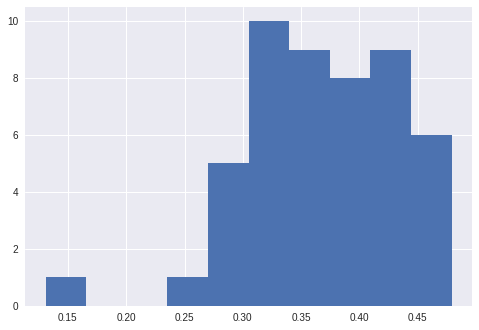

In [339]:

df_per['percentage_dog_owners'].hist()

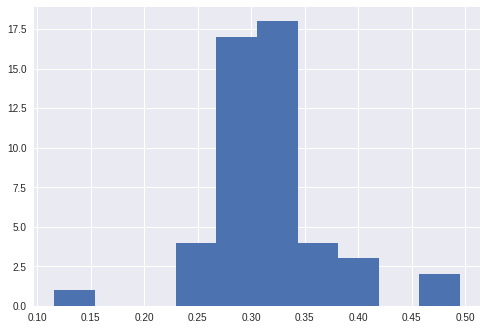

In [340]:
df_per['percentage_cat_owners'].hist()

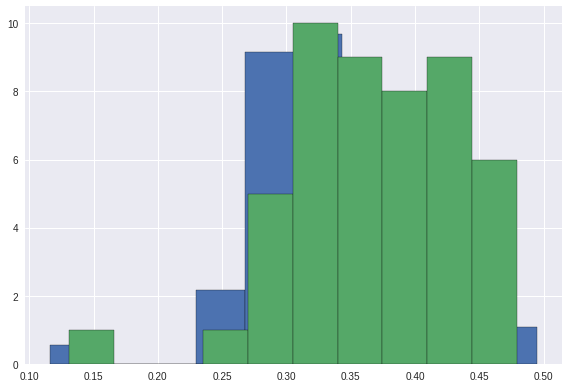

In [366]:
# este es mi segundo y último intento
plt.style.use("seaborn")
# bins = [0.5,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50] # quise manipular los bins, pero no consigo entender del todo
plt.hist(df_per['percentage_cat_owners'], edgecolor="black", density=True) # después de convertir los valores en números los coloco para marcar las barras con edgecolor e igualar 
plt.hist(df_per['percentage_dog_owners'], edgecolor="black", density=False)
#plt.xlim(3,52)
plt.tight_layout()
#print(plt.xticks([10,15,20,25,30,40,50]))
plt.show()

([<matplotlib.axis.XTick object at 0x7fca550d4e90>, <matplotlib.axis.XTick object at 0x7fca55312e90>, <matplotlib.axis.XTick object at 0x7fca550b4f50>, <matplotlib.axis.XTick object at 0x7fca55041450>, <matplotlib.axis.XTick object at 0x7fca55041990>, <matplotlib.axis.XTick object at 0x7fca55041ed0>, <matplotlib.axis.XTick object at 0x7fca55047490>], <a list of 7 Text major ticklabel objects>)


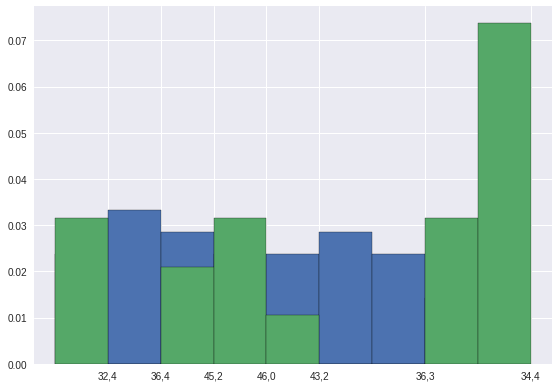

In [233]:
# esto es lo más lejops que llegué en un primer intento :(
plt.style.use("seaborn")

bins = [5,10,15,20,25,30,35,40,45,50]
plt.hist(df_per_dogs, bins=bins, edgecolor="black", range= (10, 50), density=True, )
plt.hist(df_per_cats, bins=bins, edgecolor="black", range=(10, 50), density=True, )
plt.xlim(3,52)
plt.tight_layout()
print(plt.xticks([10,15,20,25,30,40,50]))
plt.show()
